# Forecasting target 1 ..4

In [1]:
import pandas as pd

import numpy as np 
import pandas as pd 

import os
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
pd.set_option('display.max_rows', 500)

In [2]:
#Load dataset path  in a string
dataset_train = r"C:\Users\Asus\Desktop\CHemtech\ChemTech AI_тестовое задание\train_data_200k.csv"
dataset_test = r"C:\Users\Asus\Desktop\CHemtech\ChemTech AI_тестовое задание\test_data_100k.csv"

#Read csv train and test datasets
train = pd.read_csv(dataset_train, )
test = pd.read_csv(dataset_test)

#Checking out 
train.shape, test.shape

((200000, 84), (100000, 80))

In [3]:
# Library for automatic reports 
try:
    from pandas_profiling import ProfileReport
    
except ModuleNotFoundError:
    !pip install pandas-profiling[notebook,html] --user
    from pandas_profiling import ProfileReport

In [4]:
#If there is no report we create a one in html extension for train
if not os.path.exists("train_report.html"):
    profile = ProfileReport(train,minimal = True)
    profile.to_file(output_file="train_report.html")

In [5]:
#If there is no report we create a one in html extension for train
if not os.path.exists("test_report.html"):
    profile = ProfileReport(test,minimal = True)
    profile.to_file(output_file="test_report.html")

In [6]:
#Change date column name
train=train.rename(columns = {'Unnamed: 0':'date'})
test = test.rename(columns = {'Unnamed: 0':'date'})

#Set date as index in dataframes
train['date'] = pd.to_datetime(train.date)
test['date'] = pd.to_datetime(test.date)


In [7]:
# Set datetime as index
train.index = pd.to_datetime(train.date)
test.index = pd.to_datetime(test.date)

## Conclusion

From data report we can realize that some tag values have substantial ratio of Nan. Over 20% of dataset and in some cases even greater  than 90% 

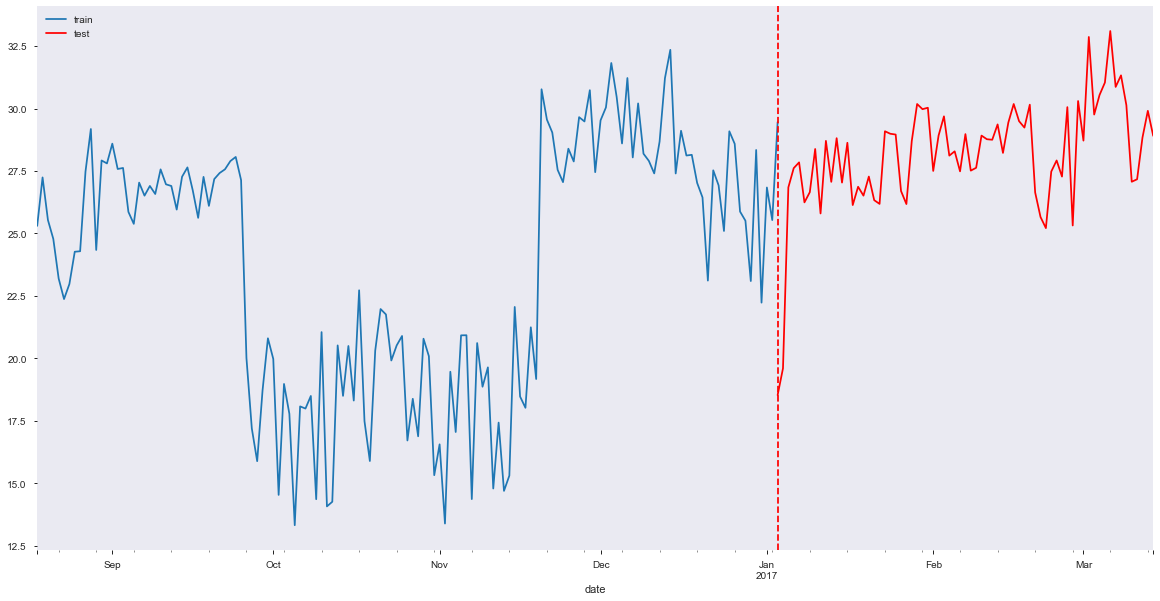

In [8]:
# Check out of train and test data sets
fig, ax = plt.subplots(figsize = (20,10))
gr_day_train = train.resample('D')['tag10'].first()
gr_day_test = test.resample('D')['tag10'].first()
ax = gr_day_train.plot(label = 'train', grid =True)

gr_day_test.plot(color='r',label = 'test')
ax.legend()
ax.axvline(train.index.max(),linestyle = '--',color = 'r')
plt.grid()

## Assumption

We can realize that we are trying to forecast some values based on historial time series of some industrial facility

In [9]:

targets = ['target1', 'target2', 'target3', 'target4']

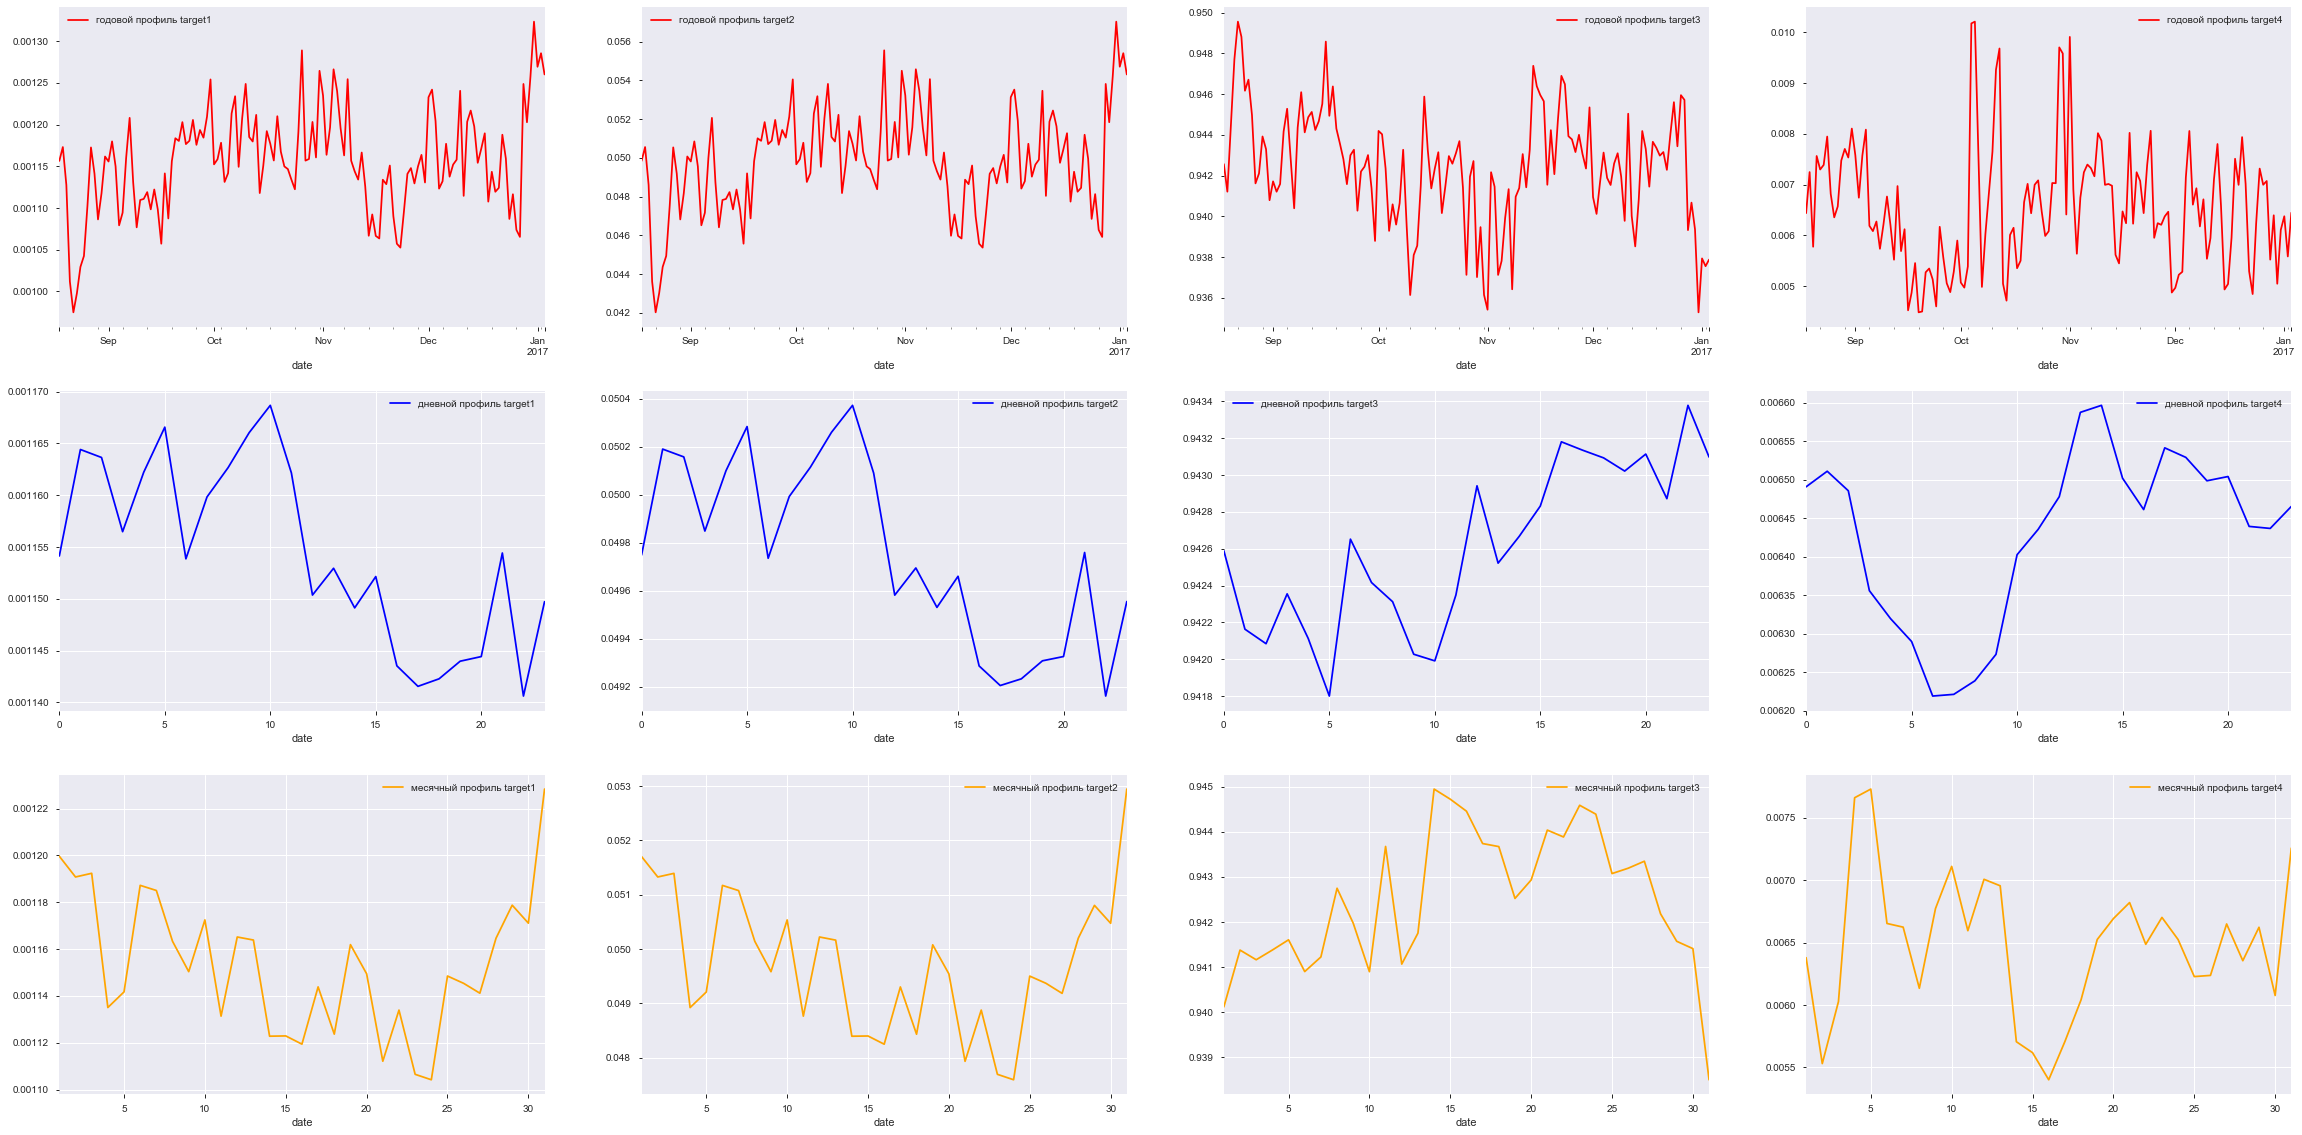

In [10]:
#Take a look to daily,  monthly and year profile of targets

fig, ax = plt.subplots(3,4,figsize = (40,20))
for num, name in enumerate(targets):
    train.resample('D')[name].median().plot(ax = ax[0,num],label = f'годовой профиль {name}', color = 'red')
    ax[0,num].legend()
    ax[0,num].grid()
    train.groupby(train.index.hour)[name].median().plot(ax = ax[1,num],label = f'дневной профиль {name}', color = 'blue')
    ax[1,num].legend()
    ax[0,num].grid()
    train.groupby(train.index.day)[name].median().plot(ax = ax[2,num],label = f'месячный профиль {name}', color = 'orange')
    ax[2,num].legend()
    ax[0,num].grid()

## Conslusion

From the profiles is possible to apreciate that targets at yearly term are around some value. Target 1 and target 2 are almost similar. 

In [11]:
# Checking out mean of nan values in dataset sorted descending 
isna = train.isna().mean().reset_index()
isna.sort_values(0, ascending = False)


,index,0
4,tag4,0.999575
6,tag6,0.998135
9,tag9,0.997965
41,tag41,0.992965
5,tag5,0.951320
51,tag51,0.926390
40,tag40,0.922110
8,tag8,0.916115
73,tag73,0.824565
61,tag61,0.820950


In [12]:
#List of tags that have more that 20% nan Values
isna = isna[isna[0]>0.20]
isna['index']

2      tag2
3      tag3
4      tag4
5      tag5
6      tag6
7      tag7
8      tag8
9      tag9
19    tag19
36    tag36
37    tag37
38    tag38
39    tag39
40    tag40
41    tag41
44    tag44
45    tag45
46    tag46
48    tag48
50    tag50
51    tag51
52    tag52
53    tag53
54    tag54
61    tag61
62    tag62
69    tag69
73    tag73
77    tag77
78    tag78
79    tag79
Name: index, dtype: object

In [13]:
# Make a dataset copy
_train = train.copy()


In [14]:
# Droping out tags that have a nan ratio greater that 20%
train = train.drop(isna['index'], axis =1)

In [15]:
train.columns

Index(['date', 'tag1', 'tag10', 'tag11', 'tag12', 'tag13', 'tag14', 'tag15',
       'tag16', 'tag17', 'tag18', 'tag20', 'tag21', 'tag22', 'tag23', 'tag24',
       'tag25', 'tag26', 'tag27', 'tag28', 'tag29', 'tag30', 'tag31', 'tag32',
       'tag33', 'tag34', 'tag35', 'tag42', 'tag43', 'tag47', 'tag49', 'tag55',
       'tag56', 'tag57', 'tag58', 'tag59', 'tag60', 'tag63', 'tag64', 'tag65',
       'tag66', 'tag67', 'tag68', 'tag70', 'tag71', 'tag72', 'tag74', 'tag75',
       'tag76', 'target1', 'target2', 'target3', 'target4'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000292E9611108>,
      dtype=object)

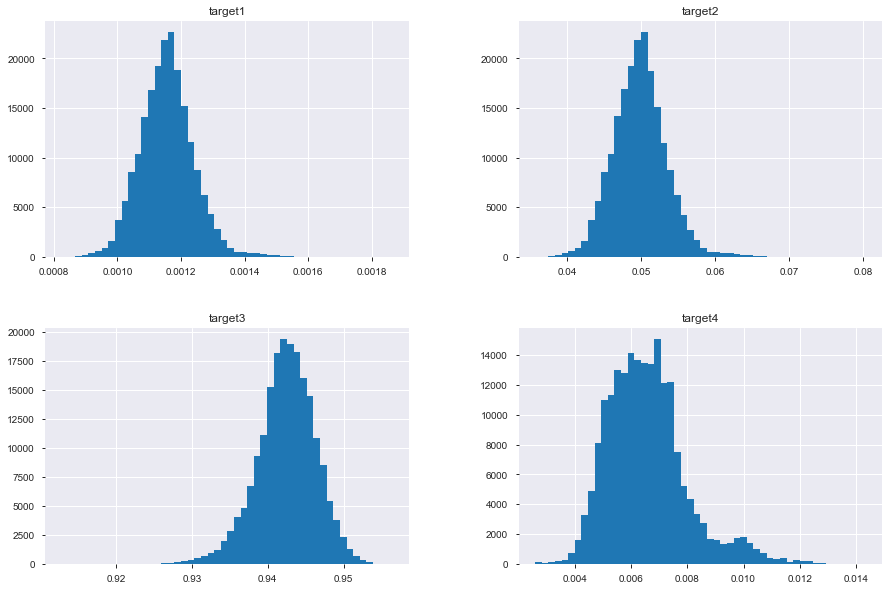

In [16]:
targets = ['target1', 'target2', 'target3', 'target4']

#Cheking ahout target values
train[targets].hist(bins = 50, figsize=(15,10))

## Conclusion

All thet targets seems to fixed to gausian distribution. Another fact is that the order of values in some cases are thousandths. In this case we should take care and Scaled the values before training model 

In [17]:
from sklearn.base import TransformerMixin

In [18]:
# Inheriting from the base class for all transformers
class Transformer(TransformerMixin):
    def __init__(self,method_string,**kwargs):
        self.method_string = method_string
        self.kwargs = kwargs
    def fit(self,X,y = None):
        return self
    def transform(self,X):
        X.replace([-np.inf,np.inf],0,inplace = True)
        if self.method_string == 'interpolate':
            return X.interpolate(**self.kwargs)
        elif self.method_string == 'ffill':
            return X.fillna(method = self.method_string)
        elif self.method_string == 'bfill':
            return X.fillna(method = self.method_string)
        else:
            print('Not implemented')

In [19]:
# IN this casee we fill the nan values using bfill method
tr = Transformer(method_string = 'bfill')
train = tr.fit_transform(train)


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200000 entries, 2016-08-18 00:00:00 to 2017-01-03 21:19:00
Data columns (total 53 columns):
date       200000 non-null datetime64[ns]
tag1       200000 non-null float64
tag10      200000 non-null float64
tag11      200000 non-null float64
tag12      200000 non-null float64
tag13      200000 non-null float64
tag14      200000 non-null float64
tag15      200000 non-null float64
tag16      200000 non-null float64
tag17      200000 non-null float64
tag18      200000 non-null float64
tag20      200000 non-null float64
tag21      200000 non-null float64
tag22      200000 non-null float64
tag23      200000 non-null float64
tag24      200000 non-null float64
tag25      200000 non-null float64
tag26      200000 non-null float64
tag27      200000 non-null float64
tag28      200000 non-null float64
tag29      200000 non-null float64
tag30      200000 non-null float64
tag31      200000 non-null float64
tag32      200000 non-null float64
tag33   

## Training models

In [21]:
from sklearn.model_selection import train_test_split
from catboost.utils import eval_metric
from catboost import CatBoostRegressor, Pool

In [22]:
#Solit the train data in subset valid and trian in order to validate results
from sklearn.model_selection import train_test_split

train_data, valid_data =  train_test_split(train, test_size=0.2, random_state=42, shuffle =False, stratify=None)



train_data.shape, valid_data.shape

((160000, 53), (40000, 53))

In [23]:
# Droping out tags that were taked of from train dataset
test_data = test.drop(isna['index'], axis =1)
test_data.shape

(100000, 49)

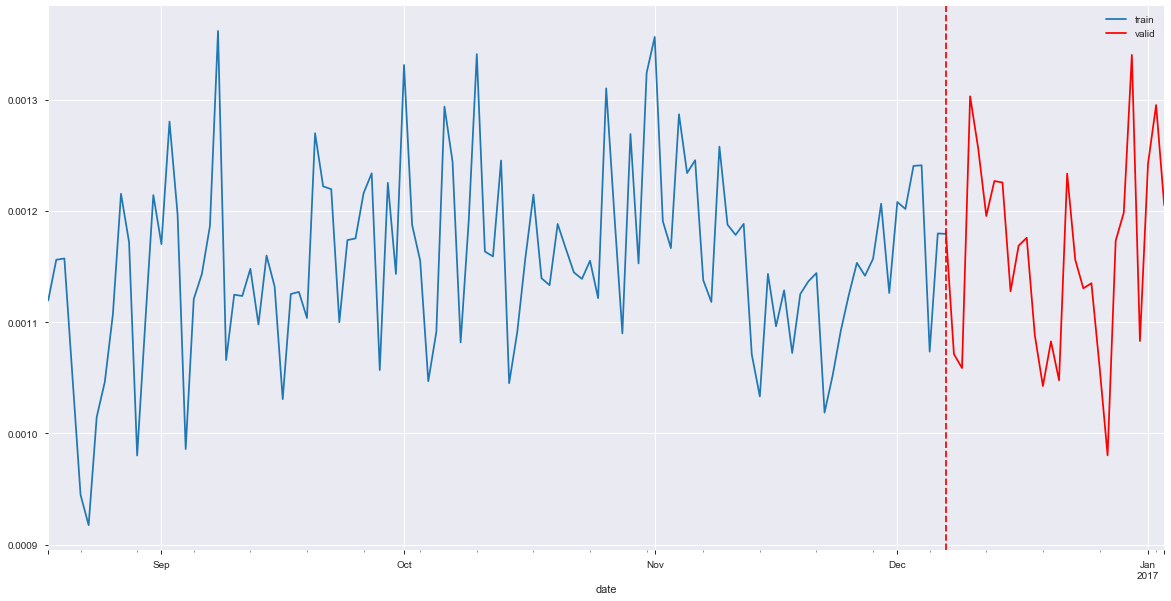

In [24]:
# Cheking out how split train and valid subsets in time series axis
fig, ax = plt.subplots(figsize=(20,10))
gr_train = train_data.resample('D')['target1'].first()
gr_valid = valid_data.resample('D')['target1'].first()
#gr_test = test_data.resample('D')['target1'].first()
ax = gr_train.plot(label = 'train')

gr_valid.plot(color='r',label = 'valid')
#gr_test.plot(color='orange',label = 'test')
ax.legend()
ax.axvline(train_data.index.max(),linestyle = '--',color = 'r')
#ax.axvline(valid_data.index.max(),linestyle = '--',color = 'orange')

In [25]:
# Droping out date column
test_data = test_data.drop('date',1)
train_data =train_data.drop('date',1)
valid_data = valid_data.drop('date',1)

In [26]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
# Assigment of train and valid features and targets
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

X_train =  train_data.drop(targets, 1)
y_train =  train_data[targets]

X_valid = valid_data.drop(targets, 1)
y_valid = valid_data[targets]


In [28]:
# Linear regresion model multi output method
mul_LinearRegression = MultiOutputRegressor(LinearRegression()).fit(X_train, y_train)
pred_1 = mul_LinearRegression.predict(X_valid)
print("Правильность на valid наборе: {:.2f}".format(mul_LinearRegression.score(X_valid, y_valid)))
print("Правильность на обучающем наборе: {:.2f}".format(mul_LinearRegression.score(X_train, y_train)))
print("MSE на valid наборе: {:.12f}".format(mean_squared_error(y_valid, pred_1)))

Правильность на valid наборе: 0.51
Правильность на обучающем наборе: 0.83
MSE на valid наборе: 0.000003367378


In [29]:
# Mean absolute error value for linear regression model 
multi_lr_mse = mean_squared_error(y_valid, pred_1)
print("MSE на valid наборе: {:.12f}".format(multi_lr_mse))

MSE на valid наборе: 0.000003367378


In [30]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=30, random_state=13)
forest.fit(X_train, y_train)
pred_2 = forest.predict(X_valid)
print("Правильность на valid наборе: {:.2f}".format(forest.score(X_valid, y_valid)))
print("Правильность на тренировочном наборе:{:.2f}".format(forest.score(X_train, y_train)))
print("MSE на valid наборе: {:.12f}".format(mean_squared_error(y_valid, pred_2)))

Правильность на valid наборе: 0.25
Правильность на тренировочном наборе:1.00
MSE на valid наборе: 0.000006774871


In [31]:
Rf_mse =mean_squared_error(y_valid, pred_2)
print("MSE на valid наборе: {:.12f}".format(Rf_mse))

MSE на valid наборе: 0.000006774871


In [32]:

multicatboost = MultiOutputRegressor(CatBoostRegressor(verbose=False))
multicatboost.fit(X_train, y_train)
pred_3 = multicatboost.predict(X_valid)

print("Правильность на valid наборе: {:.2f}".format(multicatboost.score(X_valid, y_valid)))
print("Правильность на обучающем наборе: {:.2f}".format(multicatboost.score(X_train, y_train)))

print("MSE на valid наборе: {:.12f}".format(mean_squared_error(y_valid, pred_3)))

Правильность на valid наборе: 0.69
Правильность на обучающем наборе: 0.99
MSE на valid наборе: 0.000003343250


In [33]:
multicat_mse = mean_squared_error(y_valid, pred_3)
print("MSE на valid наборе: {:.12f}".format(mean_squared_error(y_valid, pred_3)))

MSE на valid наборе: 0.000003343250


In [34]:
model_LinearRegressor = LinearRegression().fit(X_train, y_train)
pred_4 = model_LinearRegressor.predict(X_valid)
print("Правильность на valid наборе: {:.2f}".format(model_LinearRegressor.score(X_valid, y_valid)))
print("Правильность на обучающем наборе: {:.2f}".format(model_LinearRegressor.score(X_train, y_train)))
lr_mse = mean_squared_error(y_valid, pred_4)
print("MSE на valid наборе: {:.12f}".format( lr_mse))

Правильность на valid наборе: 0.62
Правильность на обучающем наборе: 0.84
MSE на valid наборе: 0.000003367378


In [35]:
lr_mse = mean_squared_error(y_valid, pred_4)
print("MSE на valid наборе: {:.12f}".format( lr_mse))

MSE на valid наборе: 0.000003367378


In [36]:
# k-nearest neighbors for multioutput regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
# fit model
model.fit(X_train, y_train)
# make a prediction

yhat = model.predict(X_valid)
# summarize prediction
print("Правильность на valid наборе: {:.2f}".format(model.score(X_valid, y_valid)))
print("Правильность на обучающем наборе: {:.2f}".format(model.score(X_train, y_train)))
print("MSE на valid наборе: {:.16f}".format(mean_squared_error(y_valid, yhat)))

Правильность на valid наборе: -1.25
Правильность на обучающем наборе: 1.00
MSE на valid наборе: 0.0000201763218082


In [37]:
# Pipeline 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet
from itertools import product
from sklearn.metrics import mean_absolute_error

In [38]:
#Searching best params for blending aproach
buf = dict()
#Блендинг
for i in product([{'method_string':'bfill'},{'method_string':'ffill'}],
              [{'with_mean':True, 'with_std':True},],
              [{'alpha':0.5},{'alpha':1000},{'alpha':0.01}]):
    print(i[0])
    model = Pipeline([('transform',Transformer(**i[0])),('scaler',StandardScaler(**i[1])),
                  ('estimator',ElasticNet(random_state = 22,**i[2]))])
    model_1 = Pipeline([('transform',Transformer(**i[0])),('scaler',StandardScaler(**i[1])),
                  ('estimator',RandomForestRegressor(random_state = 22,))])
    model.fit(X_train,y_train)
    model_1.fit(X_train,y_train)
    pred = 0.5*model.predict(X_valid)+0.5*model_1.predict(X_valid)
    buf[str(i)] = mean_squared_error(y_valid,pred)
buf

{'method_string': 'bfill'}
{'method_string': 'bfill'}
{'method_string': 'bfill'}
{'method_string': 'ffill'}
{'method_string': 'ffill'}
{'method_string': 'ffill'}


{"({'method_string': 'bfill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.5})": 7.026666873610602e-06,
 "({'method_string': 'bfill'}, {'with_mean': True, 'with_std': True}, {'alpha': 1000})": 7.026666873610602e-06,
 "({'method_string': 'bfill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.01})": 7.026666873610602e-06,
 "({'method_string': 'ffill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.5})": 7.026666873610602e-06,
 "({'method_string': 'ffill'}, {'with_mean': True, 'with_std': True}, {'alpha': 1000})": 7.026666873610602e-06,
 "({'method_string': 'ffill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.01})": 7.026666873610602e-06}

In [39]:
#Blending aproach of three methods
buf = dict()


for i in product([{'method_string':'bfill'},{'method_string':'ffill'}],
              [{'with_mean':True, 'with_std':True},],
              [{'alpha':0.5},{'alpha':1000},{'alpha':0.01}]):
    print(i[0])
    model = Pipeline([('transform',Transformer(**i[0])),('scaler',StandardScaler(**i[1])),
                  ('estimator',ElasticNet(random_state = 22,**i[2]))])
    model_1 = Pipeline([('transform',Transformer(**i[0])),('scaler',StandardScaler(**i[1])),
                  ('estimator',RandomForestRegressor(random_state = 22,))])
    model_2 = Pipeline([('transform',Transformer(**i[0])),('scaler',StandardScaler(**i[1])),
                  ('estimator',Lasso(random_state = 22,))])
    
    model.fit(X_train,y_train)
    model_1.fit(X_train,y_train)
    model_2.fit(X_train,y_train)
    pred = 0.2*model.predict(X_valid)+0.6*model_1.predict(X_valid)+0.2*model_2.predict(X_valid)
    buf[str(i)] = mean_squared_error(y_valid,pred)
buf

{'method_string': 'bfill'}
{'method_string': 'bfill'}
{'method_string': 'bfill'}
{'method_string': 'ffill'}
{'method_string': 'ffill'}
{'method_string': 'ffill'}


{"({'method_string': 'bfill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.5})": 6.819194637732184e-06,
 "({'method_string': 'bfill'}, {'with_mean': True, 'with_std': True}, {'alpha': 1000})": 6.819194637732184e-06,
 "({'method_string': 'bfill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.01})": 6.819194637732184e-06,
 "({'method_string': 'ffill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.5})": 6.819194637732184e-06,
 "({'method_string': 'ffill'}, {'with_mean': True, 'with_std': True}, {'alpha': 1000})": 6.819194637732184e-06,
 "({'method_string': 'ffill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.01})": 6.819194637732184e-06}

In [40]:
#Blending aproach of two methods
buf = dict()

for i in product([{'method_string':'bfill'},{'method_string':'ffill'}],
              [{'with_mean':True, 'with_std':True},],
              [{'alpha':0.5},{'alpha':1000},{'alpha':0.01}]):
    print(i[0])
    model = Pipeline([('transform',Transformer(**i[0])),('scaler',StandardScaler(**i[1])),
                  ('estimator',MultiOutputRegressor(CatBoostRegressor(verbose=False)))])
    model_1 = Pipeline([('transform',Transformer(**i[0])),('scaler',StandardScaler(**i[1])),
                  ('estimator',RandomForestRegressor(random_state = 22,))])
   
    
    model.fit(X_train,y_train)
    model_1.fit(X_train,y_train)
    
    pred = 0.5*model.predict(X_valid)+0.5*model_1.predict(X_valid)
    buf[str(i)] = mean_squared_error(y_valid,pred)
buf

{'method_string': 'bfill'}
{'method_string': 'bfill'}
{'method_string': 'bfill'}
{'method_string': 'ffill'}
{'method_string': 'ffill'}
{'method_string': 'ffill'}


{"({'method_string': 'bfill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.5})": 4.612117253356442e-06,
 "({'method_string': 'bfill'}, {'with_mean': True, 'with_std': True}, {'alpha': 1000})": 4.612117253356442e-06,
 "({'method_string': 'bfill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.01})": 4.612117253356442e-06,
 "({'method_string': 'ffill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.5})": 4.612117253356442e-06,
 "({'method_string': 'ffill'}, {'with_mean': True, 'with_std': True}, {'alpha': 1000})": 4.612117253356442e-06,
 "({'method_string': 'ffill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.01})": 4.612117253356442e-06}

In [41]:
#Catboosting searching params
buf = dict()

for i in product([{'method_string':'bfill'},{'method_string':'ffill'}],
              [{'with_mean':True, 'with_std':True},],
              [{'alpha':0.5},{'alpha':1000},{'alpha':0.01}]):
    print(i[0])
    model = Pipeline([('transform',Transformer(**i[0])),('scaler',StandardScaler(**i[1])),
                  ('estimator',MultiOutputRegressor(CatBoostRegressor(verbose=False)))])
    
   
    
    model.fit(X_train,y_train)
 
    
    pred = model.predict(X_valid)
    buf[str(i)] = mean_squared_error(y_valid,pred)
buf

{'method_string': 'bfill'}
{'method_string': 'bfill'}
{'method_string': 'bfill'}
{'method_string': 'ffill'}
{'method_string': 'ffill'}
{'method_string': 'ffill'}


{"({'method_string': 'bfill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.5})": 3.3562513258308803e-06,
 "({'method_string': 'bfill'}, {'with_mean': True, 'with_std': True}, {'alpha': 1000})": 3.3562513258308803e-06,
 "({'method_string': 'bfill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.01})": 3.3562513258308803e-06,
 "({'method_string': 'ffill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.5})": 3.3562513258308803e-06,
 "({'method_string': 'ffill'}, {'with_mean': True, 'with_std': True}, {'alpha': 1000})": 3.3562513258308803e-06,
 "({'method_string': 'ffill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.01})": 3.3562513258308803e-06}

In [42]:
#Random Forest searching params
buf = dict()

for i in product([{'method_string':'bfill'},{'method_string':'ffill'}],
              [{'with_mean':True, 'with_std':True},],
              [{'alpha':0.5},{'alpha':1000},{'alpha':0.01}]):
    print(i[0])
    
    model_1 = Pipeline([('transform',Transformer(**i[0])),('scaler',StandardScaler(**i[1])),
                  ('estimator',RandomForestRegressor(random_state = 22,))])
   
    
    
    model_1.fit(X_train,y_train)
    
    pred = model_1.predict(X_valid)
    buf[str(i)] = mean_squared_error(y_valid,pred)
buf

{'method_string': 'bfill'}
{'method_string': 'bfill'}
{'method_string': 'bfill'}
{'method_string': 'ffill'}
{'method_string': 'ffill'}
{'method_string': 'ffill'}


{"({'method_string': 'bfill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.5})": 6.99939106284812e-06,
 "({'method_string': 'bfill'}, {'with_mean': True, 'with_std': True}, {'alpha': 1000})": 6.99939106284812e-06,
 "({'method_string': 'bfill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.01})": 6.99939106284812e-06,
 "({'method_string': 'ffill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.5})": 6.99939106284812e-06,
 "({'method_string': 'ffill'}, {'with_mean': True, 'with_std': True}, {'alpha': 1000})": 6.99939106284812e-06,
 "({'method_string': 'ffill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.01})": 6.99939106284812e-06}

In [43]:
#Linear regresion searchin params
buf = dict()

for i in product([{'method_string':'bfill'},{'method_string':'ffill'}],
              [{'with_mean':True, 'with_std':True},],
              [{'alpha':0.5},{'alpha':1000},{'alpha':0.01}]):
    print(i[0])
    
    model_1 = Pipeline([('transform',Transformer(**i[0])),('scaler',StandardScaler(**i[1])),
                  ('estimator',LinearRegression())])
   
    
    
    model_1.fit(X_train,y_train)
    
    pred = model_1.predict(X_valid)
    buf[str(i)] = mean_squared_error(y_valid,pred)
buf

{'method_string': 'bfill'}
{'method_string': 'bfill'}
{'method_string': 'bfill'}
{'method_string': 'ffill'}
{'method_string': 'ffill'}
{'method_string': 'ffill'}


{"({'method_string': 'bfill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.5})": 3.3673783110483456e-06,
 "({'method_string': 'bfill'}, {'with_mean': True, 'with_std': True}, {'alpha': 1000})": 3.3673783110483456e-06,
 "({'method_string': 'bfill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.01})": 3.3673783110483456e-06,
 "({'method_string': 'ffill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.5})": 3.3673783110483456e-06,
 "({'method_string': 'ffill'}, {'with_mean': True, 'with_std': True}, {'alpha': 1000})": 3.3673783110483456e-06,
 "({'method_string': 'ffill'}, {'with_mean': True, 'with_std': True}, {'alpha': 0.01})": 3.3673783110483456e-06}

## Selection model by performance 



In [44]:
t_1 = [train_data.target1.mean()]*len(valid_data)
t_2 = [train_data.target2.mean()]*len(valid_data)
t_3 = [train_data.target3.mean()]*len(valid_data)
t_4 = [train_data.target4.mean()]*len(valid_data)

base_prediction = pd.DataFrame(data =[t_1,t_2,t_3,t_4]).T
base_prediction.index = valid_data.index
base_prediction.columns = targets
base_prediction                                                    

,target1,target2,target3,target4
date,,,,
2016-12-07 02:40:00,0.001151,0.049596,0.942618,0.006635
2016-12-07 02:41:00,0.001151,0.049596,0.942618,0.006635
2016-12-07 02:42:00,0.001151,0.049596,0.942618,0.006635
2016-12-07 02:43:00,0.001151,0.049596,0.942618,0.006635
2016-12-07 02:44:00,0.001151,0.049596,0.942618,0.006635
...,...,...,...,...
2017-01-03 21:15:00,0.001151,0.049596,0.942618,0.006635
2017-01-03 21:16:00,0.001151,0.049596,0.942618,0.006635
2017-01-03 21:17:00,0.001151,0.049596,0.942618,0.006635


In [48]:
basis_mse = mean_squared_error(y_valid, base_prediction)
print("MSE  base model : {:.12f}".format(basis_mse))

MSE  base model : 0.000009579156


In [49]:
def R_squared(model_mse, base_mse):
    return 1-(model_mse/ base_mse)

In [50]:
models_mse = [multi_lr_mse, Rf_mse, lr_mse , multicat_mse ]
models_mse

[3.3673783110266395e-06,
 6.774871145003039e-06,
 3.3673783110307125e-06,
 3.3432495998558684e-06]

In [52]:
for i in range(len(models_mse)):
    print("Метрика R модели:{:.4%}".format( R_squared(models_mse[i],basis_mse)))

Метрика R модели:64.8468%
Метрика R модели:29.2749%
Метрика R модели:64.8468%
Метрика R модели:65.0987%


## Model Selection

Better R squered performance was achived by Catboost model, hence further we consider this model for prediction 

In [53]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
 
from sklearn.linear_model import LogisticRegression
 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## FInding top 10 tags by importance

In [54]:
#Sclaing train dataset
X_train = tr.fit_transform(X_train)

In [55]:
#Taking all dataset and droping targets
train_features  = train.drop(targets,1)
train_features = train_features.drop('date',1)
train_features.columns

Index(['tag1', 'tag10', 'tag11', 'tag12', 'tag13', 'tag14', 'tag15', 'tag16',
       'tag17', 'tag18', 'tag20', 'tag21', 'tag22', 'tag23', 'tag24', 'tag25',
       'tag26', 'tag27', 'tag28', 'tag29', 'tag30', 'tag31', 'tag32', 'tag33',
       'tag34', 'tag35', 'tag42', 'tag43', 'tag47', 'tag49', 'tag55', 'tag56',
       'tag57', 'tag58', 'tag59', 'tag60', 'tag63', 'tag64', 'tag65', 'tag66',
       'tag67', 'tag68', 'tag70', 'tag71', 'tag72', 'tag74', 'tag75', 'tag76'],
      dtype='object')

In [56]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
np.random.seed(0)


#PCA Algorithm for tp 10 tags
model = PCA(n_components=10).fit(train_features)
X_pc = model.transform(train_features)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = train_features.columns

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(sorted(dic.items()))

In [57]:
# Top 10 tags 
df

,0,1
0,PC1,tag27
1,PC10,tag47
2,PC2,tag29
3,PC3,tag11
4,PC4,tag34
5,PC5,tag64
6,PC6,tag64
7,PC7,tag20
8,PC8,tag68
9,PC9,tag49


In [58]:
#Fill nan values in test dataset
X_test = tr.fit_transform(test_data)

#Prediction with selected model
y_predict = multicatboost.predict(X_test)

In [59]:
#Puting prediction on dataframe
results = pd.DataFrame(data=y_predict, columns = targets)
results.index = test_data.index
results

,target1,target2,target3,target4
date,,,,
2017-01-03 21:21:00,0.001218,0.052614,0.942306,0.004739
2017-01-03 21:22:00,0.001214,0.052556,0.941998,0.004733
2017-01-03 21:23:00,0.001220,0.052776,0.941828,0.004733
2017-01-03 21:24:00,0.001223,0.052797,0.941814,0.004744
2017-01-03 21:25:00,0.001217,0.052862,0.942059,0.004848
...,...,...,...,...
2017-03-14 07:56:00,0.001198,0.050989,0.943245,0.004388
2017-03-14 07:57:00,0.001193,0.050986,0.943458,0.004374
2017-03-14 07:58:00,0.001194,0.051309,0.943114,0.004499


In [60]:
# Exporting results to csv 
results.to_csv(r"C:\Users\Asus\Desktop\CHemtech\prediction_results.csv")

In [61]:
#Exporting top10 tags
df.to_csv(r"C:\Users\Asus\Desktop\CHemtech\top_ten_tags.csv")

In [62]:
#Cheking out a model only with most important tags
train_f = X_pc
train_target = train[targets]

In [63]:
#Spliting 
train_features, valid_features =  train_test_split(train_f, test_size=0.2, random_state=42, shuffle =False, stratify=None)
train_target, valid_target =  train_test_split(train_target, test_size=0.2, random_state=42, shuffle =False, stratify=None)

In [64]:
train_features.shape

(160000, 10)

In [65]:
#trainig simple model and cheking out forecast
model_LinearRegressor = LinearRegression().fit(train_features, train_target)
pred_ = model_LinearRegressor.predict(valid_features)
print("Правильность на valid наборе: {:.2f}".format(model_LinearRegressor.score(valid_features, valid_target)))
print("Правильность на обучающем наборе: {:.2f}".format(model_LinearRegressor.score(train_features, train_target)))
print("MSE на valid наборе: {:.12f}".format(mean_squared_error(valid_target, pred_)))

Правильность на valid наборе: -0.13
Правильность на обучающем наборе: 0.41
MAE на valid наборе: 0.000010171441


In [66]:
#Traing on tope 10 bases tags
multicatboost = MultiOutputRegressor(CatBoostRegressor(verbose=False))

multicatboost = multicatboost.fit(train_features, train_target)
pred_a = multicatboost.predict(valid_features)
print("Правильность на valid наборе: {:.2f}".format(multicatboost.score(valid_features, valid_target)))
print("Правильность на обучающем наборе: {:.2f}".format(multicatboost.score(train_features, train_target)))
print("MSE на valid наборе: {:.12f}".format(mean_squared_error(valid_target, pred_a)))

Правильность на valid наборе: -0.60
Правильность на обучающем наборе: 0.90
MAE на valid наборе: 0.000015843938


## Conclusion

With top 10 tag training model, performance is not better than Catboost model trained with hole dataset tags

# Plotting results

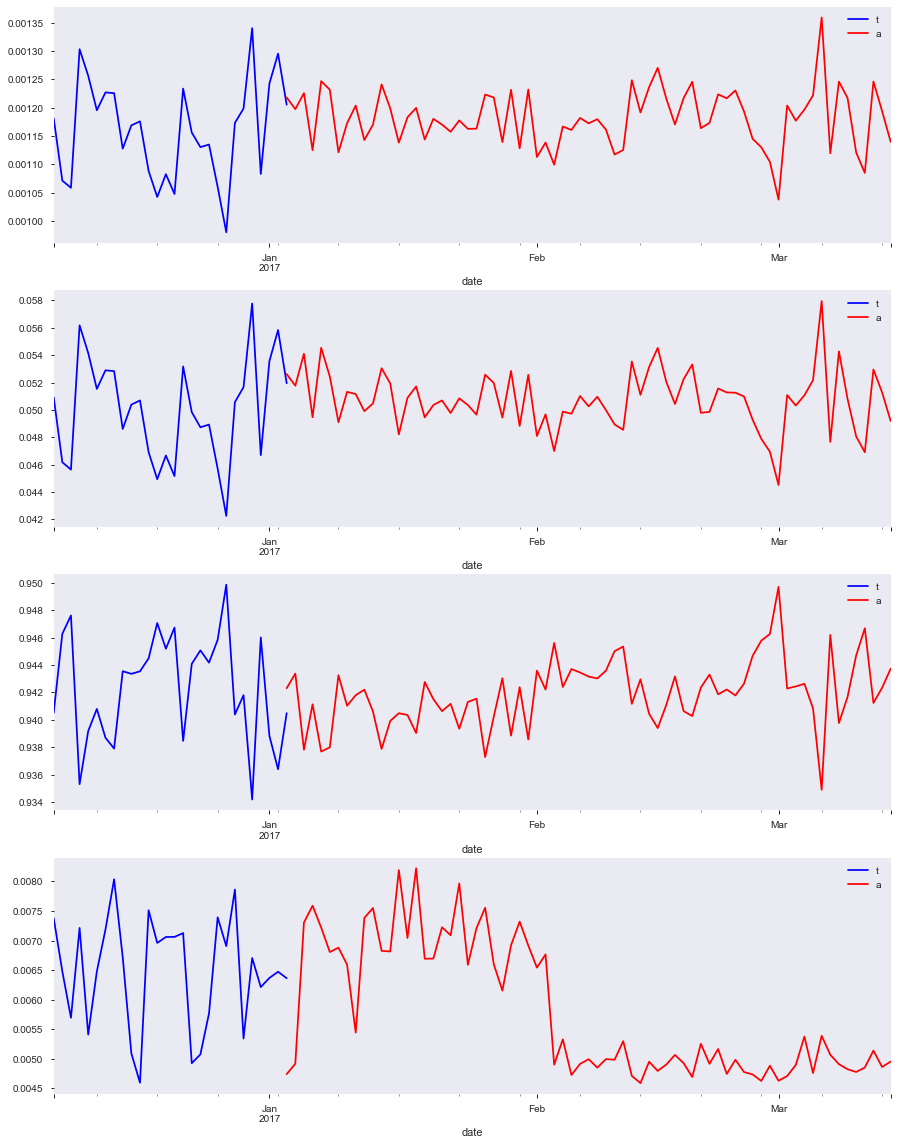

In [68]:
#Ploting results forecast and actual values 
import matplotlib.cm as cm

gr_t1 = valid_data.resample('D')['target1'].first()
gr_t2 = valid_data.resample('D')['target2'].first()
gr_t3 = valid_data.resample('D')['target3'].first()
gr_t4 = valid_data.resample('D')['target4'].first()

gr_p1= results.resample('D')['target1'].first()
gr_p2 = results.resample('D')['target2'].first()
gr_p3 = results.resample('D')['target3'].first()
gr_p4 = results.resample('D')['target4'].first()

fig, ax = plt.subplots(4,1,figsize = (15,20))

gr_t1.plot(ax = ax[0], label = 'train', color = 'blue')
gr_p1.plot(ax = ax[0],label = 'prediction', color = 'r')

ax[0].legend('target1')
ax[0].grid()

gr_t2.plot(ax = ax[1],label = 'train', color = 'b')
gr_p2.plot(ax = ax[1],label = 'prediction', color = 'red')
ax[1].legend('target2')
ax[1].grid()

gr_t3.plot(ax = ax[2],label = 'train', color = 'b')
gr_p3.plot(ax = ax[2],label = 'prediction', color = 'red',)
ax[2].legend('target3')
ax[2].grid()
    
gr_t4.plot(ax = ax[3],label = 'train', color = 'b')
gr_p4.plot(ax = ax[3],label = 'prediction', color = 'red')
ax[3].legend('target4')
ax[3].grid()
